In [6]:
pip install grapl_causal

# GRAPL: Tutorial 01


Tutorial illustrating the use of the GRAPL library, for representing, analyzing and processing
**acyclic directed mixed graphs** (**ADMG**s) for structural causal modelling.

**License**: CC BY-SA 4.0 2021.


If you use this code, please cite:

Little, M. A., Badawy, R. (2019). [Causal bootstrapping](https://arxiv.org/pdf/1910.09648.pdf), *ArXiV*, arXiv:1910.09648

In [7]:
import grapl.algorithms as algs
import grapl.dsl as dsl

### Create a GRAPL DSL parser

In [8]:
grapl_obj = dsl.GraplDSL()

### Create a DAG from a GRAPL string

In [9]:
dag_grapl = ' "Simple back-door graph"; \
    C; X; Y; \
    C -> X; \
    C -> Y; \
    X -> Y; '

G = grapl_obj.readgrapl(dag_grapl)

### Display the DAG object

#### Text description

In [10]:
G.display()

Title: "Simple back-door graph"
Vars: Y,C,X
Parents:
Y <- C,X
X <- C
Children:
C -> Y,X
X -> Y
Bidirects:


#### Graph

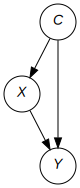

In [11]:
G

### Check if the DAG is acyclic

In [12]:
G.isdag() # Expected: True

True

### Get the factorized joint distribution

       Parameters:
       G (ADMG)           -- DAG representing the causal graph (must not have bidirects)
       Y (Set of Strings) -- Set of effect variables (if empty, all variables in G)
       simplify (Boolean) -- If True, final expression is explicitly simplified

       Returns: (String, Expr, Boolean)
       If G is a DAG, factored, Latex-format equation String, corresponding Eqn object, and True.
       If G is not a DAG then '', None, False.

In [14]:
fac_str, fac_eqn, isdag = algs.dagfactor(G, simplify=False)

fac_eqn # Expected: p(X,C,Y)=[p(Y|X,C)p(X|C)p(C)]

### Get the interventional (cause-effect) distribution of X on Y

In [15]:
id_str, id_eqn, isdag = algs.truncfactor(G, {'X'}, {'Y'})

id_eqn # Expected: p_{X}(Y)=\sum_{C}[p(Y|X,C)p(C)]